
# RTP (Regulēšanas teorijas pamati / Basics of Control Theory) 
# Interactive Jupyter Notebook

This Notebook contains:
- Theory on controllers (P, I, D, PI, PD)
- Calculations with explanations
- Interactive widgets to select parameters `m` & `n`
- Visualisatin of Bode-plots

## Necessary libraries:
```bash
pip install numpy matplotlib sympy ipywidgets scipy
```


In [1]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
from scipy import signal


## 🔧 Personal parameter input

Input m and n once — they will be applied for all tasks.

- `m` — last-but-one number of ID
- `n` — last number of ID



In [2]:
# Inputs for all assignments

# Example: last two numbers of ID ...56 → m = 5, n = 6
m = 0
n = 1

print(f"Inputs: m = {m}, n = {n}")


Inputs: m = 0, n = 1


In [3]:
from ipywidgets import interact, IntSlider

# Initializing of global inputs (by default)
m, n = 0, 1

def update_parameters(m_slider, n_slider):
    global m, n
    m = m_slider
    n = n_slider
    print(f"Preset conditions: m = {m}, n = {n}")

interact(update_parameters, 
         m_slider=IntSlider(value=m, min=0, max=9, description="m"),
         n_slider=IntSlider(value=n, min=0, max=9, description="n"));


interactive(children=(IntSlider(value=0, description='m', max=9), IntSlider(value=1, description='n', max=9), …

## Assignment 1: Proportional controller


Amplification factor $G^*(\omega) = mn$ dB. Input resistance $R_1 = 25\ \text{k}\Omega$.  
Calculate resistance of the feedback $R_2$,  build Bode-plot of the transfer function


In [4]:

def p_controller(m=2, n=3):
    G_db = m * n
    R1 = 25e3
    G = 10**(G_db / 20)
    R2 = G * R1

    print(f"Amplification factor: {G_db} dB")
    print(f"R2 = {R2:.2f} Ω")

    w = np.logspace(1, 5, 500)
    mag = 20 * np.log10(G) * np.ones_like(w)
    phase = np.zeros_like(w)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
    ax1.semilogx(w, mag)
    ax1.set_title("Bode Magnitude")
    ax1.set_ylabel("Magnitude (dB)")
    ax1.grid(True, which="both")

    ax2.semilogx(w, phase)
    ax2.set_title("Bode Phase")
    ax2.set_ylabel("Phase (deg)")
    ax2.set_xlabel("Frequency (rad/s)")
    ax2.grid(True, which="both")
    plt.tight_layout()
    plt.show()

interact(p_controller, m=IntSlider(1, 1, 9), n=IntSlider(1, 1, 9));


interactive(children=(IntSlider(value=1, description='m', max=9, min=1), IntSlider(value=1, description='n', m…

## Assignment 2: Integrating controller


Amplification factor $G^*(1000) = -mn$ dB at $\omega = 1000$ rad/sec. Feedback with capacitor $C = 0.8\ \mu F$.  
Calculate input resistance R1.


In [5]:

def i_controller(m=0, n=1):
    G_db = -m * n
    w = 1000
    C = 0.8e-6
    G = 10**(G_db / 20)
    Ti = 1 / (G * w)
    R1 = Ti / C

    print(f"Amplification factor: {G_db} dB")
    print(f"Input resistance R1 = {R1:.2f} Ω")
    print(f"Integrating time constant Ti = {Ti:.3f} s")

    # Bode plot
    system = signal.TransferFunction([1], [1, 0])
    w, mag, phase = signal.bode(system)

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)
    plt.title("Bode plot - Integrating controller")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True, which="both")

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Phase (deg)")
    plt.grid(True, which="both")
    plt.tight_layout()
    plt.show()

interact(i_controller, m=IntSlider(1, 1, 9), n=IntSlider(1, 1, 9));


interactive(children=(IntSlider(value=1, description='m', max=9, min=1), IntSlider(value=1, description='n', m…

## Assignment 3: Differentiating controller


$G^*(70) = mn$ dB, frequency $\omega = 70$ rad/sec. Feedback - resistor $R = 50\ \text{k}\Omega$.  
Calculate input capacitance.


In [6]:

def d_controller(m=0, n=1):
    G_db = m*n
    w = 70
    R = 50e3
    G = 10**(G_db / 20)
    Td = G / w
    C = Td / R

    print(f"Amplification factor: {G_db} dB")
    print(f"Required capacitance C = {C * 1e6:.2f} μF")
    print(f"Dif. time constant Td = {Td:.3f} s")

    # Bode plot for derivative controller
    num = [1, 0]
    den = [1]
    system = signal.TransferFunction(num, den)
    w, mag, phase = signal.bode(system)

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)
    plt.title("Bode plot - Derivative controller")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True, which="both")

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Phase (deg)")
    plt.grid(True, which="both")
    plt.tight_layout()
    plt.show()

interact(d_controller, m=IntSlider(1, 1, 9), n=IntSlider(1, 1, 9));


interactive(children=(IntSlider(value=1, description='m', max=9, min=1), IntSlider(value=1, description='n', m…

## Assignment 4: PI-controller


PI-controller with $k=25$, $G^*(\omega) = 20\log_{10}(k + mn)$ dB at $\omega = 3$ rad/sec.  
Calculate integrating time constant $T_i$, coupling frequency and phase shift.


In [7]:

def pi_controller(m=0, n=1):
    k = 25
    w = 3
    G_db = 20 * np.log10(k + m * n)
    Ti = k / w
    phase_deg = np.arctan(w * Ti) * 180 / np.pi
    wc = 1 / Ti

    print(f"Amplification (dB): {G_db:.2f}")
    print(f"Integrating time constant Ti = {Ti:.3f} s")
    print(f"Coupling frequency: {wc:.2f} rad/s")
    print(f"Phase shift: {phase_deg:.2f}°")

    num = [k * Ti, k]
    den = [Ti, 0]
    system = signal.TransferFunction(num, den)
    w, mag, phase = signal.bode(system)

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)
    plt.title("Bode plot - PI controller")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True, which="both")

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Phase (deg)")
    plt.grid(True, which="both")
    plt.tight_layout()
    plt.show()

interact(pi_controller, m=IntSlider(1, 1, 9), n=IntSlider(1, 1, 9));


interactive(children=(IntSlider(value=1, description='m', max=9, min=1), IntSlider(value=1, description='n', m…

## Assignment 5: PD-controller


PD-controller with $k=20$, $G^*(\omega) = 20\log_{10}(k + mn)$ at $\omega = 450$ rad/s.  
Calculate $T_d$, coupling frequency and phase shift.


In [8]:

def pd_controller(m=2, n=3):
    k = 20
    w = 450
    G_db = 20 * np.log10(k + m * n)
    Td = (k + m * n - k) / w
    phase_deg = np.arctan(w * Td) * 180 / np.pi
    wc = 1 / Td

    print(f"Amplification (dB): {G_db:.2f}")
    print(f"Time contant Td = {Td:.5f} s")
    print(f"Coupling frequency: {wc:.2f} rad/s")
    print(f"Pgase shift: {phase_deg:.2f}°")

    num = [k * Td, k]
    den = [1]
    system = signal.TransferFunction(num, den)
    w, mag, phase = signal.bode(system)

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)
    plt.title("Bode plot - PD controller")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True, which="both")

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Phase (deg)")
    plt.grid(True, which="both")
    plt.tight_layout()
    plt.show()

interact(pd_controller, m=IntSlider(1, 1, 9), n=IntSlider(1, 1, 9));


interactive(children=(IntSlider(value=1, description='m', max=9, min=1), IntSlider(value=1, description='n', m…

## Assignment 6: Series connection of two aperiodic elements


First order elements with $k_1 = 15$, $k_2 = 25$ and time constants $T_1 = 1,m$ s, $T_2 = 0,n$ s.  
Calculate transfer function and build Bode-plot at $\omega = 5 + m + n$ rad/s.


In [9]:

def two_aperiodic_blocks(m=2, n=3):
    k1, k2 = 15, 25
    T1 = 1 + 0.1 * m
    T2 = 0.1 * n
    k_total = k1 * k2
    num = [k_total]
    den = np.convolve([T1, 1], [T2, 1])
    system = signal.TransferFunction(num, den)

    w = np.logspace(-1, 3, 500)
    w_target = 5 + m + n

    _, mag, phase = signal.bode(system, w=w)

    print(f"Transfer function: {k_total} / (({T1:.2f}s + 1)({T2:.2f}s + 1))")
    print(f"Target frequency: {w_target:.2f} rad/s")

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)
    plt.axvline(w_target, color='r', linestyle='--')
    plt.title("Bode plot - Two aperiodic blocks")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True, which="both")

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)
    plt.axvline(w_target, color='r', linestyle='--')
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Phase (deg)")
    plt.grid(True, which="both")
    plt.tight_layout()
    plt.show()

interact(two_aperiodic_blocks, m=IntSlider(0, 0, 9), n=IntSlider(0, 0, 9));


interactive(children=(IntSlider(value=0, description='m', max=9), IntSlider(value=0, description='n', max=9), …

## Assignment 7: Stability of second order system


System with transfer function $W_{ob} = \frac{3}{1 + 0,n s + 0,(1+m) s^2}$, $W_{as} = 1 - 0,n$, $k_p = 20 + m$.  
Estimate stability and calculate the roots of charcteristic equation.


📌 Characteristic equation:
     2               
0.3⋅s  + 0.3⋅s + 47.2

📉 Roots of characteristic equation:
  λ1: -0.5000 + 12.5333j
  λ2: -0.5000 - 12.5333j

🧠 Conclusion:
✅ The system is stable (all the roots are in left half-plane).


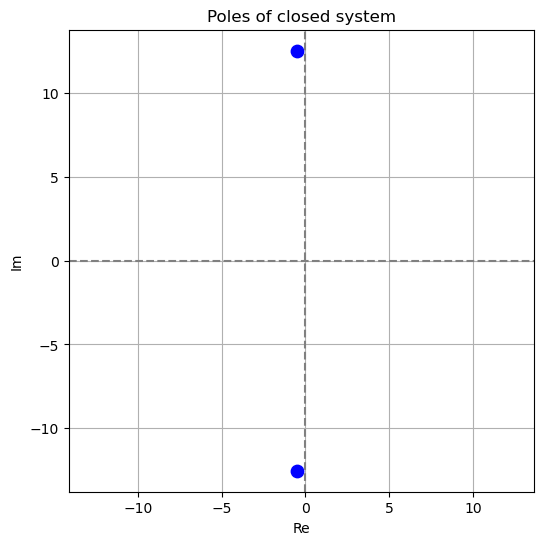

In [10]:
import sympy as sp
from sympy.abc import s
import numpy as np
import matplotlib.pyplot as plt

# === Individual variant ===
m = 2  # last-but-one number of ID 
n = 3  # last number of ID

# === Coefficients of characteristic equation ===
a2 = 0.1 * (1 + m)
a1 = 0.1 * n
K = 3 * (1 - 0.1 * n) * (20 + m)

# Characteristic equation:
char_eq = a2*s**2 + a1*s + 1 + K
print("📌 Characteristic equation:")
sp.pprint(char_eq)

# === Calculation of roots ===
coeffs = sp.Poly(char_eq, s).all_coeffs()
coeffs = [float(c.evalf()) for c in coeffs]
roots = np.roots(coeffs)

print("\n📉 Roots of characteristic equation:")
unstable = False
pure_imag = False

for i, r in enumerate(roots):
    re, im = r.real, r.imag
    print(f"  λ{i+1}: {re:.4f} {'+' if im >= 0 else '-'} {abs(im):.4f}j")
    if re > 0:
        unstable = True
    elif np.isclose(re, 0, atol=1e-6):
        pure_imag = True

# === Estimation of stability ===
print("\n🧠 Conclusion:")
if unstable:
    print("❌ The system is not stable (exist roots with positive real component).")
elif pure_imag:
    print("⚠ Bordercase of stability (exist roots on imaginary axis).")
else:
    print("✅ The system is stable (all the roots are in left half-plane).")

# === Визуализация ===
plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.scatter(np.real(roots), np.imag(roots), color='blue', s=80)
plt.title("Poles of closed system")
plt.xlabel("Re")
plt.ylabel("Im")
plt.grid(True)
plt.axis('equal')
plt.show()


## Assignment 8: Stability of second order system


System with transfer function $W_{ob} = \frac{3}{1 + 0,n s + 0,(1+m) s^2}$, $W_{as} = 1 - 0,n$, $k_p = 20 + m$.  
Estimate stability and calculate the roots of charcteristic equation.

In [11]:
# Rauss criterion for equation s^3 + 0.07s^2 + 0.79s + 9 = 0
import numpy as np

def routh_table(coeffs):
    n = len(coeffs)
    m = int(np.ceil(n / 2))
    table = np.zeros((n, m))
    table[0, :len(coeffs[::2])] = coeffs[::2]
    table[1, :len(coeffs[1::2])] = coeffs[1::2]
    for i in range(2, n):
        for j in range(m - 1):
            a, b = table[i - 2, 0], table[i - 2, j + 1]
            c, d = table[i - 1, 0], table[i - 1, j + 1]
            table[i, j] = ((c * b - a * d) / c) if c != 0 else 0
    return table

coeffs = [1, 0.07, 0.79, 9]
rt = routh_table(coeffs)
print("Routh table:\n", rt)
print("Stability:", "The system is stable" if np.all(rt[:,0] > 0) else "The system is NOT stable")


Routh table:
 [[ 1.00000000e+00  7.90000000e-01]
 [ 7.00000000e-02  9.00000000e+00]
 [-1.27781429e+02  0.00000000e+00]
 [ 9.00000000e+00  0.00000000e+00]]
Stability: The system is NOT stable


## Assignment 9: Stability of second order system


System with transfer function $W_{ob} = \frac{3}{1 + 0,n s + 0,(1+m) s^2}$, $W_{as} = 1 - 0,n$, $k_p = 20 + m$.  
Estimate stability and calculate the roots of charcteristic equation.

In [12]:
from sympy.abc import s
import sympy as sp

m = 2  # is changeble
Ti = 0.1 * (1 + m)
char_eq = s**3 + 4*s**2 + 6*s + (1 + Ti)
coeffs = sp.Poly(char_eq, s).all_coeffs()
coeffs = [float(c.evalf()) for c in coeffs]

def routh_table(coeffs):
    n = len(coeffs)
    m = int(np.ceil(n / 2))
    table = np.zeros((n, m))
    table[0, :len(coeffs[::2])] = coeffs[::2]
    table[1, :len(coeffs[1::2])] = coeffs[1::2]
    for i in range(2, n):
        for j in range(m - 1):
            a, b = table[i - 2, 0], table[i - 2, j + 1]
            c, d = table[i - 1, 0], table[i - 1, j + 1]
            table[i, j] = ((c * b - a * d) / c) if c != 0 else 0
    return table

rt = routh_table(coeffs)
print("Routh table:\n", rt)
print("Stability:", "The system is stable" if np.all(rt[:,0] > 0) else "The system is NOT stable")


Routh table:
 [[1.    6.   ]
 [4.    1.3  ]
 [5.675 0.   ]
 [1.3   0.   ]]
Stability: The system is stable


## Assignment 10: Stability of second order system


System with transfer function $W_{ob} = \frac{3}{1 + 0,n s + 0,(1+m) s^2}$, $W_{as} = 1 - 0,n$, $k_p = 20 + m$.  
Estimate stability and calculate the roots of charcteristic equation.

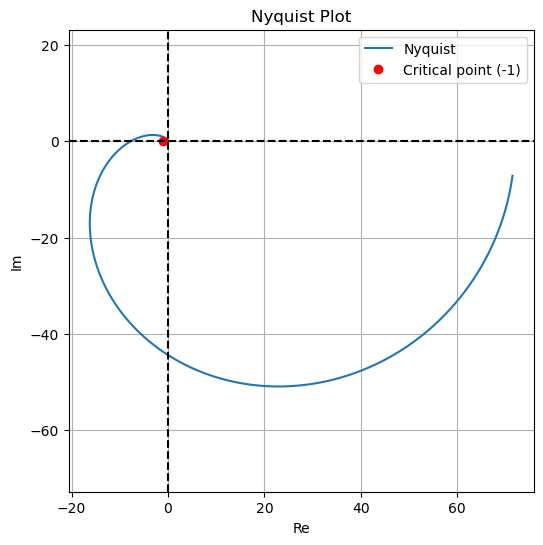

In [13]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

m, n = 2, 3
k1, k2, k3 = 1 + m, 1 + n, 1 + m + n
T1, T2, T3 = 0.1 * m, 0.1 * n, 0.1 * (m + n)

num = [k1 * k2 * k3]
den = np.convolve([T1, 1], np.convolve([T2, 1], [T3, 1]))
system = signal.TransferFunction(num, den)
w, H = signal.freqresp(system)

Re, Im = np.real(H), np.imag(H)

plt.figure(figsize=(6, 6))
plt.plot(Re, Im, label="Nyquist")
plt.plot(-1, 0, 'ro', label="Critical point (-1)")
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.title("Nyquist Plot")
plt.grid(True)
plt.axis("equal")
plt.show()


## Assignment 11: Stability of second order system


System with transfer function $W_{ob} = \frac{3}{1 + 0,n s + 0,(1+m) s^2}$, $W_{as} = 1 - 0,n$, $k_p = 20 + m$.  
Estimate stability and calculate the roots of charcteristic equation.

🔍 Search for minimum stable k...
❌ Stable value of k is not found within the set range.
Roots of the characteristic equation at k = None:
  root 1: -0.0350 + 0.8881j
  root 2: -0.0350 - 0.8881j
  root 3: 0.0000 + 0.0000j


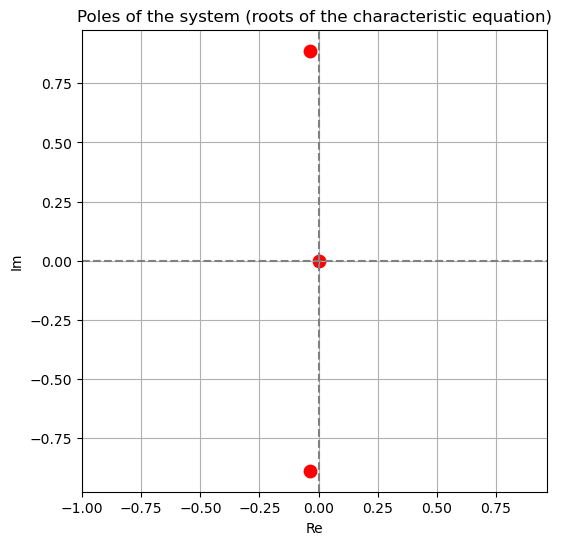

In [ ]:
import numpy as np
import sympy as sp
from sympy.abc import s

# === 1. Rauss table ===
def routh_table(coeffs):
    n = len(coeffs)
    m = int(np.ceil(n / 2))
    table = np.zeros((n, m))
    table[0, :len(coeffs[::2])] = coeffs[::2]
    table[1, :len(coeffs[1::2])] = coeffs[1::2]
    for i in range(2, n):
        for j in range(m - 1):
            a, b = table[i - 2, 0], table[i - 2, j + 1]
            c, d = table[i - 1, 0], table[i - 1, j + 1]
            table[i, j] = ((c * b - a * d) / c) if c != 0 else 0
    return table

def is_stable(coeffs):
    table = routh_table(coeffs)
    return np.all(table[:, 0] > 0)

# === 2. Minimum stable k ===
print("🔍 Search for minimum stable k...")

k_found = None
for k in np.linspace(0.1, 20, 400):
    coeffs = [1, 0.07, 0.79, k]
    if is_stable(coeffs):
        k_found = round(k, 3)
        break

if k_found is not None:
    print(f"✅ The system if stable at k = {k_found}")

    # === 3. Calculation of static error ===
    K = sp.Symbol('K', positive=True)
    W_s = K / (s**3 + 0.07*s**2 + 0.79*s + K)
    W_stable = W_s.subs(K, k_found)
    ess = sp.limit(1 / (1 + W_stable), s, 0)



    print(f"📉 Static error εst = {ess.evalf():.5f}")
else:
    print("❌ Stable value of k is not found within the set range.")

import matplotlib.pyplot as plt

# Roots of the characteristic equation
coeffs_k = [1, 0.07, 0.79, k_found]
roots = np.roots(coeffs_k)

print(f"Roots of the characteristic equation at k = {k_found}:")
for i, r in enumerate(roots):
    print(f"  root {i+1}: {r.real:.4f} {'+' if r.imag >= 0 else '-'} {abs(r.imag):.4f}j")

# Plots
plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.scatter(np.real(roots), np.imag(roots), color='red', s=80)
plt.title("Poles of the system (roots of the characteristic equation)")
plt.xlabel("Re")
plt.ylabel("Im")
plt.grid(True)
plt.axis('equal')
plt.show()

